In [1]:
%load_ext autoreload
%autoreload 2

Question: How does the frequency of song title in lyrics effect top 100 billboard ranking?

# Introduction #
In the introduction, you should aim to tell the reader what your project is about. In doing so, you should answer the following questions:

What is the question you are trying to answer or the story that you are trying you tell?
Why is this question or story important?
What were the main steps your project made towards answering the question or telling the story?
Beyond answering these questions, you are free to structure this section however you wish.

# Methodology #
In the methodology, you should explain how you obtained, processed, and summarized or visualized the data. In doing so, you should answer the following questions:

Where did you get your data from?
How did you get this data (i.e., did you programmatically download it or did you access it through an API)?
How did you store and/or process this data (e.g., did you store and process it in Pandas)?
What information did you get from this data that you used in the presentation of your results?
# Results #
In the results, you should show the main summaries or visualizations of your data, along with any accompanying information. In doing so, you should answer the following questions:

What summaries or visualizations did you create?
What are the interesting and/or important parts of these summaries or visualizations?
How do these results answer your questions or tell your story?
# Conclusion #
In the conclusion, you should provide key takeaways for the reader. In doing so, you should answer the following questions, where applicable:

What are the important insights that the reader should get from this project?
What are the contextual or ethical implications of your topic or work?
What lessons did you learn as you did the project?
What were the most difficult, challenging, or frustrating parts of the project?
In what ways would you extend or change your project if you had more time?

# Introduction #
Music is a source of expression, artistic ingenuity, and entertainment cross culturally. The vast majority of the world listens to music and estimations of about 80-90% of the world listens to some form of music. This means each billboard top 100 song is widely popular, but why is that? We believe there are underlining conditions that make songs more popular than others. When looking at the top 100 songs we realized most of the songs had catchy, repetitive lyrics to them and amoung those lyrics was the title of the song nested inside. Thus, our question for the project was created. How does the frequency of a song title in its lyrics effect top 100 billboard ranking? Of course, there are probably many other underlining conditions that we can later test for, but for the scope of this project we wanted to get a really good sense the influence of one. This question is important because we produce data that music artists can use to see what the trends of song titles in their lyrics are. The billboard top 100 songs of the year are ideally the most popular songs and most accepted by the listeners. This means in order for artists to be successful and create songs that people like they need to adjust to what people want. The major steps in the project to answer this question was getting the top 100 billboard songs from 1970-2021 and getting the number of times the title was in the lyrics. With all the data we were able to visualize various statistics, which aid in answering the question. 


# Methodology #
What information did you get from this data that you used in the presentation of your results?



When answering this question we need two crucial pieces of data: The song title in the top 100 billboard and the lyrics of that song. We also wanted more data of the songs because this would allow us to compare and analyze the data more effectively. These extra data points were the year the song was in the top 100 billboard and it's rank. The first data we needed to collect was the song titles. After looking at a few APIs we decided to scrape the data from Wikipedia because it had all the data we wanted and a good range of years for the data. We scraped the data by installing the python Wikipedia library and then searching the individual pages of "Billboard Year-End Hot 100 singles of (year)", where year was our input to scrape different years at a time. This function only does one year at a time. 

In [ ]:
import wikipedia
def create_song_list(year):
    page_title = "Billboard Year-End Hot 100 singles of " + str(year)
    page = wikipedia.page(title=(page_title), auto_suggest=False)
    full_html = page.html()

    table_start_index = full_html.find("wikitable sortable")
    table = full_html[table_start_index:]
    table = table[0:table.find("</tbody></table>")]

Once we had the location of the data we wanted on the page, we then were able to loop through the data and store it as a list. We also had to fix special characters to make all the titles in the same style. This only runs through one page and is in the previous code block's function. 

In [ ]:
song_list = []
for i in range(1, 400, 4):
        title_line = line_list[i]
        if "wiki" in title_line:
            title = title_line[title_line.find("title=") + 7:]
            title = title[0:title.find("\"")]
        else:
            title = title_line[title_line.find("\"") + 1:]
            title = title[0:title.find("\"")]

        artist_line = line_list[i+1]
        if "wiki" in artist_line:
            artist = artist_line[artist_line.find("title=") + 7:]
            artist = artist[0:artist.find("\"")]
        else:
            artist = artist_line[artist_line.find("<td>") + 4:]
        song_list.append([title, artist])

    return song_list

Once, we were able to get the data from one wikipedia page, we were able to run the entire range of years we wanted data from, which was the entire range the wikipedia page contained.

In [ ]:
def get_all_top_songs(start, end):
    song_list = [str(start)]
    for i in range(start, end + 1):
        song_list.append(create_song_list(i))
    return song_list

Now that we had a list that contained all the data we wanted from wikipedia we wrote that list to a CSV file. This would allow us to store the data and see the data easily. We wrote the list to songs.csv.

In [ ]:
def write_songs_to_file(song_list):
    with open("songs.csv", "w") as my_file:
        writer = csv.writer(my_file)
        writer.writerow(["Title", "Artist", "Year", "Rank"])
        year_number = int(song_list[0])
        song_list = song_list[1:]
        for year in song_list:
            for index, song in enumerate(year):
                writer.writerow([song[0], song[1], year_number, index + 1])
            year_number += 1

This was a collection of all the data we needed from Wikipedia and it contained the title, artist, year, and rank of each song. We got a total of 5200 songs. 


With this data from Wikipedia we next needed to get the lyrics of the songs. We achieved this by using the website Genius.com. Before we could scrape this data we needed to convert the csv file containing the data from Wikipedia into a list. Then, we had to adjust the style of the titles and artists of the songs to match the Genius url styles. We used the imports beautifulsoup and requests to access the genius websites and retrieve the data. For each song we inputted the song title and artist name into the url and looped that for each song. This worked because the url for each song was identical ignoring the title and artist portions. We used the requests import to actually get the page. The function below retieves the page for a single song. 

In [ ]:
def get_lyrics(song):
    url = "https://genius.com/" + song[1] + "-" + song[0] + "-" + "lyrics"
    page = requests.get(url)
    if str(page) == "<Response [404]>":
        alt_artist = song[1][0:song[1].find("-")]
        page = requests.get("https://genius.com/" + alt_artist + "-" +
                            song[0] + "-" + "lyrics")


In the same function as the above code block, we then used the html parser beautifulsoup to pick the pieces of the website we wanted, which was only the lyrical portions. Then, we added the lyrics to a string.

In [ ]:
html = BeautifulSoup(page.text, "html.parser")
    lyrics = html.find_all("div",
                           class_="Lyrics__Container-sc-1ynbvzw-6 jYfhrf")
    if not lyrics:
        lyrics = html.find_all("div", class_="lyrics")
    if not lyrics:
        lyrics = html.find("div",
                           class_="Lyrics__Container-sc-1ynbvzw-2 jgQsqn")
    final_lyrics = ""
    if lyrics:
        for item in lyrics:
            final_lyrics += " ".join(item.strings)

    return final_lyrics

We did the process of retieving the lyrics from Genius for every song we had with the function get_all_lyrics.

In [ ]:
def get_all_lyrics():
    song_list = csv_to_list("songs.csv")
    songs = format_list_for_genius(song_list)
    lyrics = []
    for song in songs:
        lyrics.append(get_lyrics(song))
    return lyrics

After we collected all the data from Genius, we realized that we missed some of the songs. We were missing 3.79% of the lyrics because the title or artist name was different than what was on the Wikipedia page. We decided this error was low enough to not continue, but to minimize the error we took the artists with the most songs in the top 100 billboard rankings that we weren't scraping and hard coded them in to get more songs.

In [1]:
# percentage of songs we don't have lyrics for
song_list_by_song = get_total_song_data("songs_with_lyrics.csv", by_song=True)
count = 0
for song in song_list_by_song:
    if song[4] == -1:
        count += 1
print(str(round(count/52, 2)) + "%")

We then added the lyrics to a list containing all the song information. This list contains every songs information and lyrics. We used this list to write the data to another CSV file to store the data. This file is called songs_with_lyrics.csv. 

In [ ]:
def write_lyrics_to_file():
    song_list = song_list_with_lyrics()
    with open("songs_with_lyrics.csv", "w") as my_file:
        writer = csv.writer(my_file)
        writer.writerow(["Title", "Artist", "Year", "Rank", "Lyrics"])
        for song in song_list:
            writer.writerow(song)

At this point, we had all the scraping data we wanted and needed to analyze for our question. The last thing we needed was to get the frequency of each song's title within its lyrics. This was done by simply taking the title and counting how many times it appears within the lyrics. If the song was one of the songs we weren't able to retrieve lyrics for we set it's frequency to -1. The function below does this process for one song.

In [ ]:
def title_in_lyrics_one_song(song):
    title = song[0]
    lyrics = song[4]
    if '(' in title:
        title = title[0:title.find("(") - 1]
    if len(lyrics) == 0:
        return -1
    return lyrics.lower().count(title.lower())

We then did this process for every song we had and added the frequencies of song titles in lyrics to the total song data list. 

In [ ]:
def get_total_song_data(path, by_song=False):
    total_song_data = []
    song_list = csv_to_list(path)
    if by_song:
        for song in song_list:
            total_song_data.append([song[0], song[1], song[2], song[3],
                                    title_in_lyrics_one_song(song)])
    else:
        titles = []
        artists = []
        years = []
        ranks = []
        frequencies = []
        for song in song_list:
            titles.append(song[0])
            artists.append(song[1])
            years.append(song[2])
            ranks.append(song[3])
            frequencies.append(title_in_lyrics_one_song(song))
        total_song_data = [titles, artists, years, ranks, frequencies]

    return total_song_data

In [2]:
# import data using finder
import matplotlib.pyplot as plt
from finder import get_total_song_data
song_list = get_total_song_data("songs_with_lyrics.csv") #[Title, Artist, Year, Rank, Frequency]
titles = song_list[0]
artists = song_list[1]
possible_rankings = list(range(1, 101))
possible_years = list(range(1970, 2022))
frequencies = song_list[4]

Text(0.5, 1.0, 'Average Mentions by Ranking')

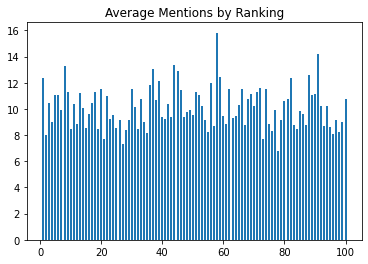

In [26]:
average_frequencies = []
for i in range(100):
    total_mentions = 0
    for j in range(i, 5200, 100):
        if frequencies[j] != -1:
            total_mentions += frequencies[j]
    average_frequencies.append(round(total_mentions/52, 2))
    
plt.bar(possible_rankings, average_frequencies, width=0.655)
plt.title("Average Mentions by Ranking")

Text(0.5, 1.0, 'Average Mentions by Year')

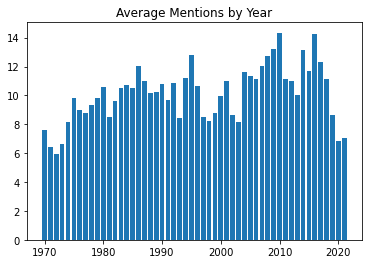

In [5]:
frequency_by_year = []
for i in range(0, 5200, 100):
    mention_count = 0
    for j in range(i, i+ 100):
        if frequencies[j] != -1:
            mention_count += frequencies[j]
    frequency_by_year.append(round(mention_count/100, 2))

plt.bar(possible_years, frequency_by_year)
plt.title("Average Mentions by Year")

[1970, 1980, 1990, 2000, 2010]
[8.15, 10.38, 9.99, 10.99, 11.76]


Text(0.5, 1.0, 'Average Mentions by Decade')

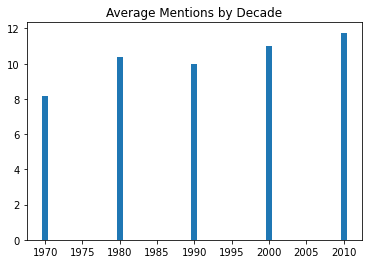

In [7]:
frequency_by_decade = []
for i in range(5):
    frequency_by_decade.append(round(sum(frequency_by_year[10*i:10*i + 10])/10, 2))

possible_decades = list(range(1970, 2020, 10))
print(possible_decades)
print(frequency_by_decade)
plt.bar(possible_decades, frequency_by_decade)
plt.title("Average Mentions by Decade")

Text(0.5, 1.0, 'Mentions in Number One Song by Year')

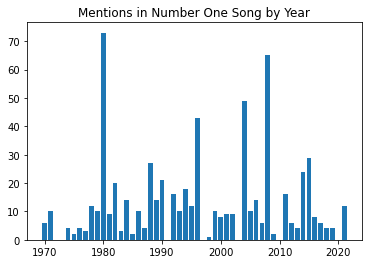

In [8]:
number_one_song_frequencies = []
for i in range(52):
    number_one_song_frequencies.append(frequencies[100*i])

plt.bar(possible_years, number_one_song_frequencies)
plt.title("Mentions in Number One Song by Year")

Text(0.5, 1.0, 'Maximum Mentions in a Song by Year')

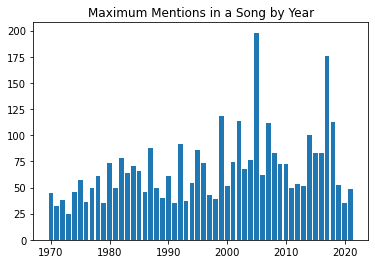

In [9]:
maximum_song_frequency_by_year = []
for i in range(52):
    maximum_song_frequency_by_year.append(max(frequencies[100*i: 100*i + 100]))
    
plt.bar(possible_years, maximum_song_frequency_by_year)
plt.title("Maximum Mentions in a Song by Year")

Text(0.5, 1.0, 'Percent Mentions of Title in Songs by Year')

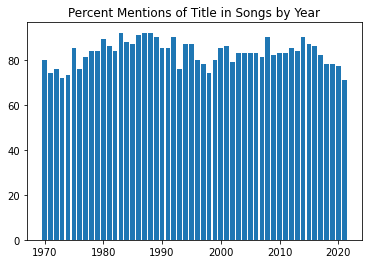

In [10]:
percent_mentions_by_year = []
for i in range(52):
    number_mentioned_in_year = 0
    for j in range(100):
        if frequencies[100*i+j] > 0:
            number_mentioned_in_year += 1
    percent_mentions_by_year.append(number_mentioned_in_year)

plt.bar(possible_years, percent_mentions_by_year)
plt.title("Percent Mentions of Title in Songs by Year")

In [65]:
from better_profanity import profanity
freq_temp = frequencies.copy()
print("Top twenty songs where the title is mentioned the most:")
previous_title = None
count = 0
while count < 20:
    mfi = freq_temp.index(max(freq_temp))
    if titles[mfi] != previous_title:
        print(f"{count + 1}. \"{profanity.censor(titles[mfi])}\" by {artists[mfi]} ({max(freq_temp)} mentions)")
        count += 1
    previous_title = titles[mfi]
    freq_temp[mfi] = 0

Top twenty songs where the title is mentioned the most:
1. "O" by Omarion (198 mentions)
2. "Down" by Marian Hill (176 mentions)
3. "Who Dat" by JT Money (118 mentions)
4. "Baby" by Ashanti (114 mentions)
5. "Thunder" by Imagine Dragons (113 mentions)
6. "Walk It Out" by Unk (112 mentions)
7. "My ****" by YG (100 mentions)
8. "Jump" by Kris Kross (92 mentions)
9. "Bad" by Michael Jackson (88 mentions)
10. "Baby" by Brandy Norwood (86 mentions)
11. "Say" by John Mayer (83 mentions)
12. "Watch Me (Whip/Nae Nae)" by Silentó (83 mentions)
13. "Work" by Rihanna (80 mentions)
14. "Get Down on It" by Kool & the Gang (78 mentions)
15. "Taste" by Tyga (77 mentions)
16. "Why" by Jadakiss (76 mentions)
17. "No" by Meghan Trainor (75 mentions)
18. "Stutter" by Joe (74 mentions)
19. "Call Me" by Blondie (73 mentions)
20. "Doin' It" by LL Cool J (73 mentions)


In [33]:
artists_and_mentions = {}
for i in range(5200):
    if artists[i] not in artists_and_mentions:
        artists_and_mentions[artists[i]] = [frequencies[i], 1]
    else:
        artists_and_mentions[artists[i]][0] += frequencies[i]
        artists_and_mentions[artists[i]][1] += 1
for musician in artists_and_mentions:
    artists_and_mentions[musician].append(round(artists_and_mentions[musician][0]/artists_and_mentions[musician][1], 2))
    
a_and_m = artists_and_mentions.copy()
print("Top ten artists who mention the title in the lyrics on average the most:")
print("(and have appeared in the top 100 more than once)\n")
for i in range(10):
    max_number = None
    max_artist = None
    for musician in a_and_m:
        if max_number is None or a_and_m[musician][2]  > max_number and a_and_m[musician][1] > 1:
            max_artist = musician
            max_number = a_and_m[musician][2]
    print(f"{i+1}. {max_artist} ({max_number} mentions)")
    a_and_m[max_artist][2] = 0

Top ten artists who mention the title in the lyrics on average the most:
(and have appeared in the top 100 more than once)

1. Silentó (83.0 mentions)
2. Omarion (66.33 mentions)
3. Tyga (65.0 mentions)
4. YG (58.5 mentions)
5. Unk (57.5 mentions)
6. Jay Sean (55.67 mentions)
7. O.T. Genasis (48.0 mentions)
8. D'Angelo (45.0 mentions)
9. Ella Mai (43.67 mentions)
10. Los del Río (43.0 mentions)


Text(0.5, 1.0, 'Percentage of Songs Where Title Is Mentioned in Lyrics')

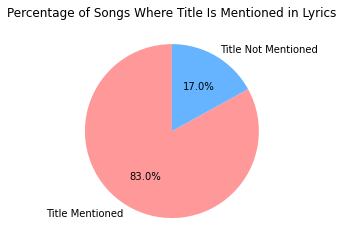

In [75]:
total_mentions_all_years = sum(percent_mentions_by_year)
pie_elements = [total_mentions_all_years, 5200 - total_mentions_all_years]
colors = ["#ff9999", "#66b3ff"]
labels = {"Title Mentioned", "Title Not Mentioned"}
plt.pie(pie_elements, labels=labels, colors=colors, autopct="%1.1f%%", startangle = 90)
plt.title("Percentage of Songs Where Title Is Mentioned in Lyrics")

<BarContainer object of 198 artists>

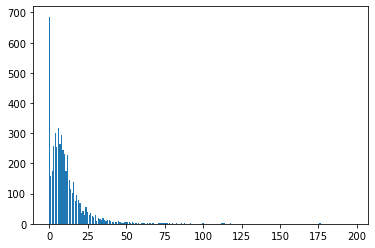

In [71]:
frequency_list = []
possible_frequencies = list(range(max(frequencies)))
for i in range(max(frequencies)):
    frequency_list.append(frequencies.count(i))
plt.bar(possible_frequencies, frequency_list)

<BarContainer object of 50 artists>

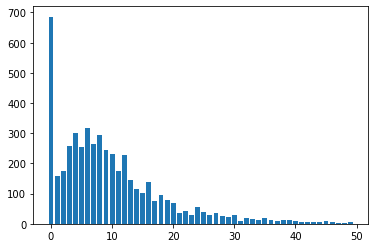

In [72]:
plt.bar(possible_frequencies[0:50], frequency_list[0:50])